In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
ls

 Il volume nell'unit… D Š Data
 Numero di serie del volume: 7009-8AD6

 Directory di D:\Developments\belle-2-napoli-hardware\notebook_marcello

21/04/2023  15:42    <DIR>          .
28/02/2023  16:34    <DIR>          ..
15/04/2023  16:57    <DIR>          .ipynb_checkpoints
28/02/2023  16:27           237.358 BGO.ipynb
10/03/2023  11:18         2.091.216 CsI.ipynb
10/03/2023  11:18           695.505 CsI_root.ipynb
10/03/2023  11:18    <DIR>          LY
28/02/2023  16:27         1.819.401 nanoc.ipynb
21/04/2023  15:42         3.003.129 PMMA_Cherenkov.ipynb
28/02/2023  16:27         2.000.509 Taratura_fingerini_Giulio.ipynb
10/03/2023  11:21    <DIR>          torre_MC
13/04/2023  12:46                72 Untitled.ipynb
               7 File      9.847.190 byte
               5 Directory  1.991.662.800.896 byte disponibili


## PMT sotto

In [3]:
df = pd.read_csv('../data/20230413/PMMA_wtelescope_PMTsotto_200mV.txt', delimiter = " ", names=['frame', 't1', 'a1', 't2', 'a2', 't3', 'a3', 't4', 'a4'])#, 'time2', 'ampl2'])#, skiprows=150000 )

In [77]:
df

,frame,t1,a1,t2,a2,t3,a3,t4,a4
0,1.0,-7.000000e-08,-0.004,-7.000000e-08,0.00,-7.000000e-08,0.01,NaN,NaN
1,1.0,-6.900000e-08,-0.004,-6.900000e-08,0.00,-6.900000e-08,0.01,NaN,NaN
2,1.0,-6.800000e-08,0.004,-6.800000e-08,0.02,-6.800000e-08,0.01,NaN,NaN
3,1.0,-6.700000e-08,0.004,-6.700000e-08,0.00,-6.700000e-08,0.01,NaN,NaN
4,1.0,-6.600000e-08,-0.004,-6.600000e-08,0.00,-6.600000e-08,0.01,NaN,NaN
...,...,...,...,...,...,...,...,...,...
134115,958.0,6.500000e-08,0.004,6.500000e-08,-0.04,6.500000e-08,-0.07,NaN,NaN
134116,958.0,6.600000e-08,0.004,6.600000e-08,-0.02,6.600000e-08,-0.05,NaN,NaN
134117,958.0,6.700000e-08,0.004,6.700000e-08,-0.02,6.700000e-08,-0.05,NaN,NaN
134118,958.0,6.800000e-08,-0.004,6.800000e-08,0.00,6.800000e-08,-0.05,NaN,NaN


Text(0, 0.5, 'Amplitude [mV]')

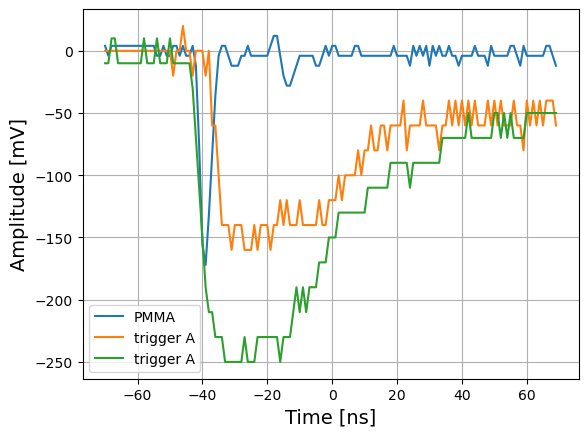

In [78]:
d=df.query('frame==16')
plt.plot(d.t1*1E9, d.a1*1000, label='PMMA')
plt.plot(d.t2*1E9, d.a2*1000, label='trigger A')
plt.plot(d.t3*1E9, d.a3*1000, label='trigger A')

#plt.plot(d.time2, d.ampl2)
plt.grid()
plt.legend()
plt.xlabel('Time [ns]', size=14)
plt.ylabel('Amplitude [mV]', size=14)
#plt.xlim(-1E2, 5E2)

Text(0, 0.5, 'Amplitude [mV]')

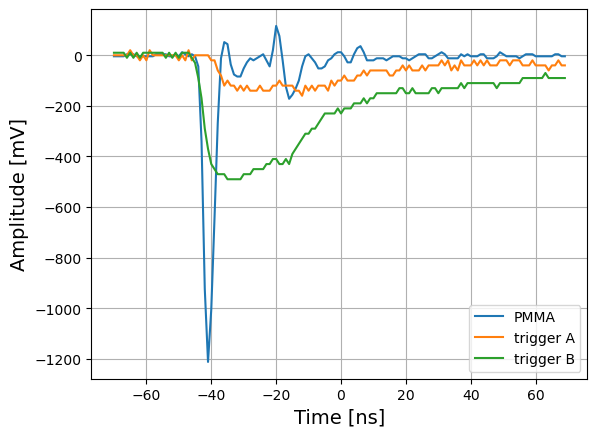

In [79]:
d=df.query('frame==65')
plt.plot(d.t1*1E9, d.a1*1000, label='PMMA')
plt.plot(d.t2*1E9, d.a2*1000, label='trigger A')
plt.plot(d.t3*1E9, d.a3*1000, label='trigger B')

#plt.plot(d.time2, d.ampl2)
plt.grid()
plt.legend()
plt.xlabel('Time [ns]', size=14)
plt.ylabel('Amplitude [mV]', size=14)
#plt.xlim(-1E2, 5E2)

(-50.0, -30.0)

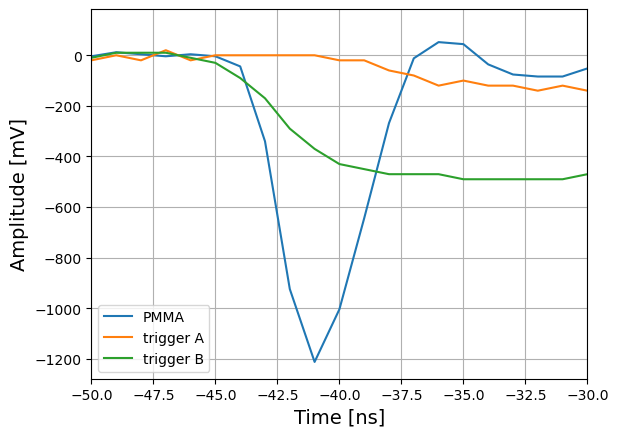

In [80]:
d=df.query('frame==65')
plt.plot(d.t1*1E9, d.a1*1000, label='PMMA')
plt.plot(d.t2*1E9, d.a2*1000, label='trigger A')
plt.plot(d.t3*1E9, d.a3*1000, label='trigger B')

#plt.plot(d.time2, d.ampl2)
plt.grid()
plt.legend()
plt.xlabel('Time [ns]', size=14)
plt.ylabel('Amplitude [mV]', size=14)
plt.xlim(-50, -30)

In [81]:
timerange = np.array([-45*1E-9, -30*1E-9])

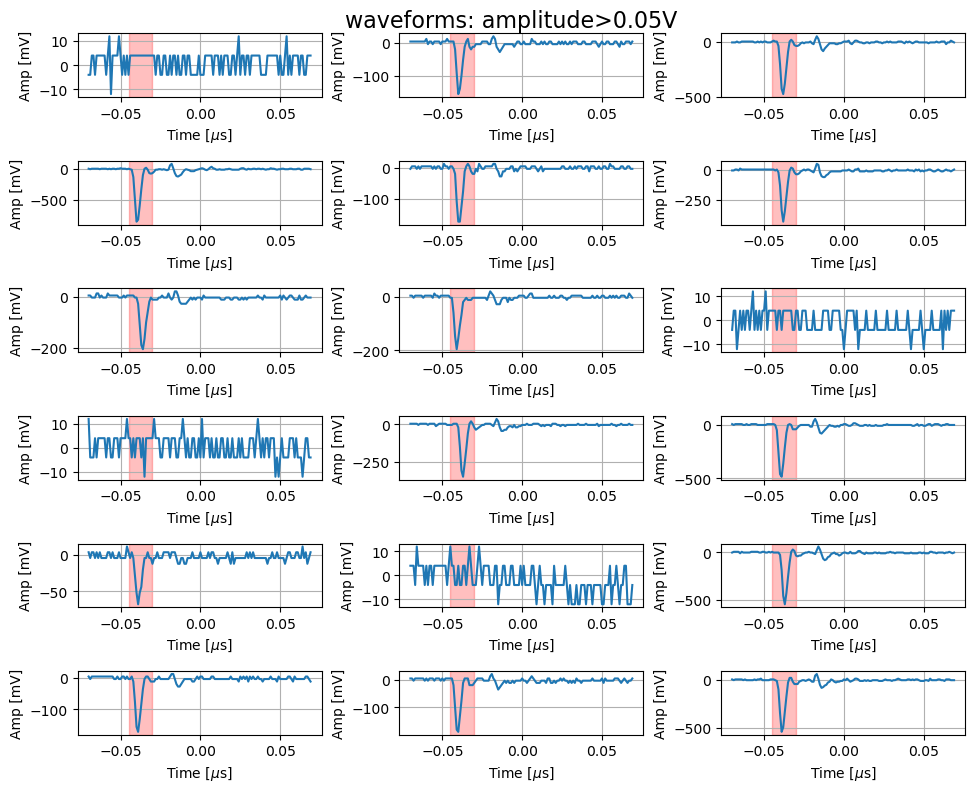

In [48]:
#%matplotlib widget
cut=0.05
i=0
j=0
plots_per_row=3
#FRAMES=IND[AMP>cut]
#FRAMES=FRAMES[:12]
FRAMES=np.arange(1, 19)
fig, axs = plt.subplots(math.ceil(len(FRAMES)/plots_per_row), plots_per_row, figsize=(10, 8))
fig.tight_layout(pad=2.5)
fig.suptitle(f'waveforms: amplitude>{cut}V', size=16)
for frame in FRAMES:
    d = df.query(f'frame=={frame}')
    axs[i][j].plot(d.t1*1E6, d.a1*1000, label='CsI')
    axs[i][j].set_xlabel(r'Time [$\mu$s]')#, size=14)
    axs[i][j].set_ylabel('Amp [mV]')#, size=14)
    axs[i][j].axvspan(timerange[0]*1E6, timerange[1]*1E6, alpha=0.25, color='red')
    axs[i][j].grid()
    j+=1
    if j%plots_per_row==0:
        i+=1
        j=0
plt.show()


In [49]:
AMP = []
IND = []
for frame in df.frame.unique():
    d = df.query(f'frame=={frame}').query(f'{timerange[0]}<t1<{timerange[1]}')
    AMP+=[np.max(np.abs(d.a1))]
    IND+=[d.frame.unique()]
    
AMP = np.array(AMP)
IND = np.array(IND)

C:\Users\Belle2\AppData\Local\Temp\ipykernel_10904\1389476667.py:5: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


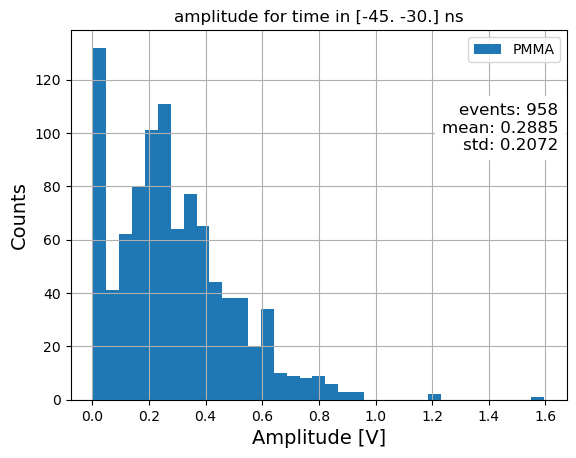

In [50]:
plt.hist(AMP, bins=35, label='PMMA')
counts=len(AMP)
mean=np.mean(AMP)
std=np.std(AMP)
plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',
            xy=(0.98, 0.8), xycoords='axes fraction',
            ha='right', va='top', textcoords='offset points', backgroundcolor="w",
            fontsize=12)
#plt.yscale('log')
plt.xlabel('Amplitude [V]', size=14)
plt.ylabel('Counts', size=14)
plt.legend()
plt.title(f'amplitude for time in {timerange*1E9} ns')
plt.grid()
plt.show()

C:\Users\Belle2\AppData\Local\Temp\ipykernel_10904\360249793.py:5: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


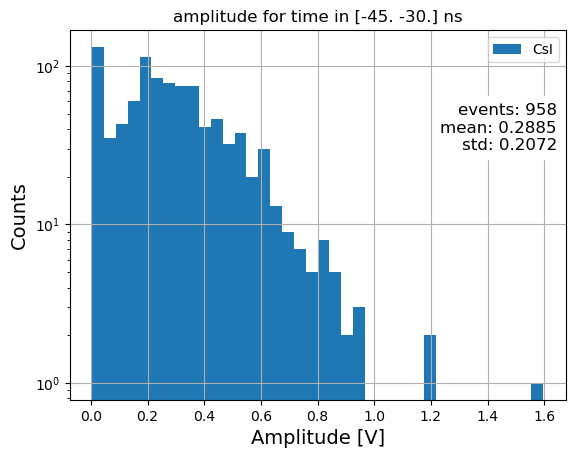

In [51]:
plt.hist(AMP, bins=38, label='CsI')
counts=len(AMP)
mean=np.mean(AMP)
std=np.std(AMP)
plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',
            xy=(0.98, 0.8), xycoords='axes fraction',
            ha='right', va='top', textcoords='offset points', backgroundcolor="w",
            fontsize=12)
#plt.yscale('log')
plt.xlabel('Amplitude [V]', size=14)
plt.ylabel('Counts', size=14)
plt.legend()
plt.title(f'amplitude for time in {timerange*1E9} ns')
plt.grid()
plt.yscale('log')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


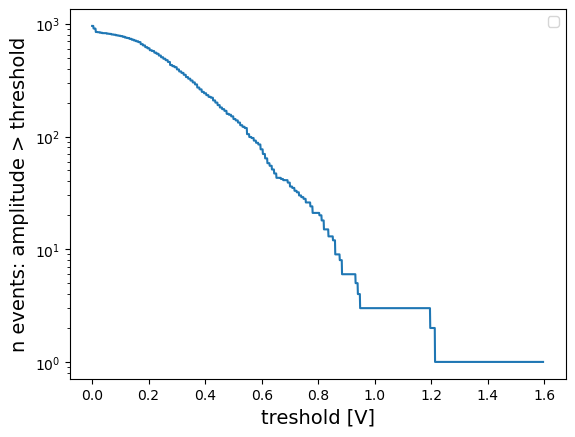

In [52]:
CUTS_IN = np.arange(0, np.max(AMP), 0.001)
COUNTS_IN = []
for cut in CUTS_IN:
    COUNTS_IN+=[len(AMP[AMP>cut])]

plt.plot(CUTS_IN, COUNTS_IN)
plt.yscale('log')
plt.xlabel('treshold [V]', size=14)
plt.ylabel('n events: amplitude > threshold', size=14)
plt.legend()

In [53]:
IND[AMP>1]

array([[ 60.],
       [ 65.],
       [193.]])

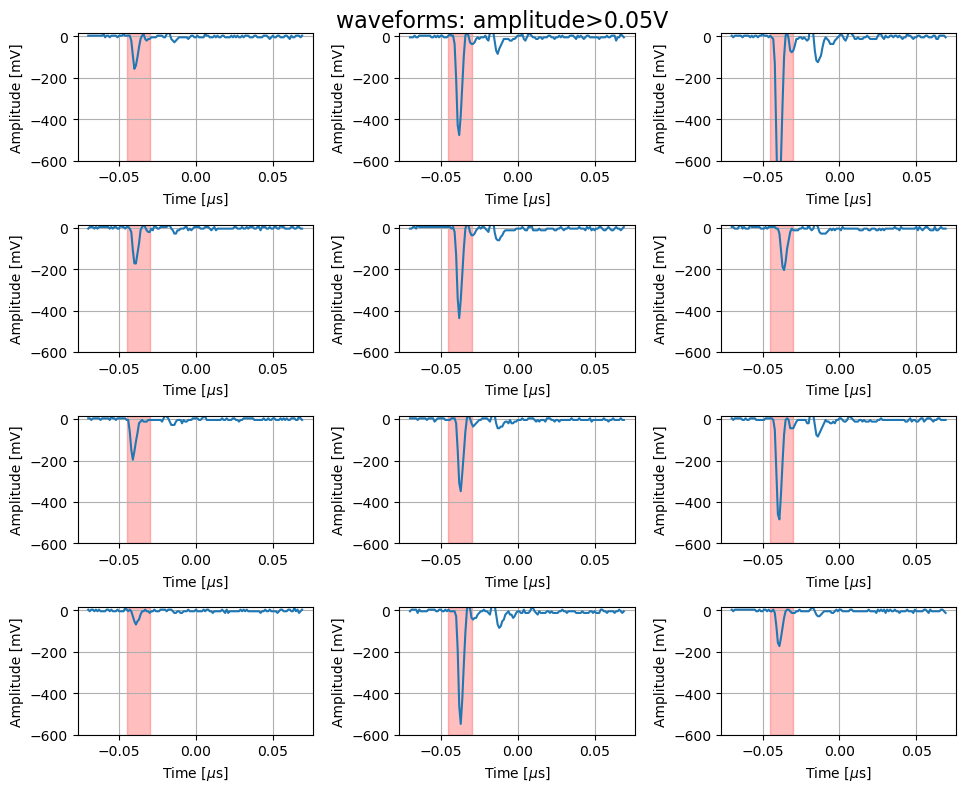

In [58]:
#%matplotlib widget
cut=0.05
i=0
j=0
plots_per_row=3
FRAMES=IND[AMP>cut]
FRAMES=FRAMES[:12]
fig, axs = plt.subplots(math.ceil(len(FRAMES)/plots_per_row), plots_per_row, figsize=(10, 8))
fig.tight_layout(pad=2.5)
fig.suptitle(f'waveforms: amplitude>{cut}V', size=16)
for frame in FRAMES:
    d = df.query(f'frame=={frame}')
    axs[i][j].plot(d.t1*1E6, d.a1*1000, label='CsI')
    axs[i][j].set_xlabel(r'Time [$\mu$s]')#, size=14)
    axs[i][j].set_ylabel('Amplitude [mV]')#, size=14)
    axs[i][j].axvspan(timerange[0]*1E6, timerange[1]*1E6, alpha=0.25, color='red')
    axs[i][j].grid()
    axs[i][j].set_ylim(-600, +15)
    
    j+=1
    if j%plots_per_row==0:
        i+=1
        j=0
plt.show()


### fuori trigger

In [60]:
timerange = np.array([-45*1E-9, -30*1E-9])-20*1E-9

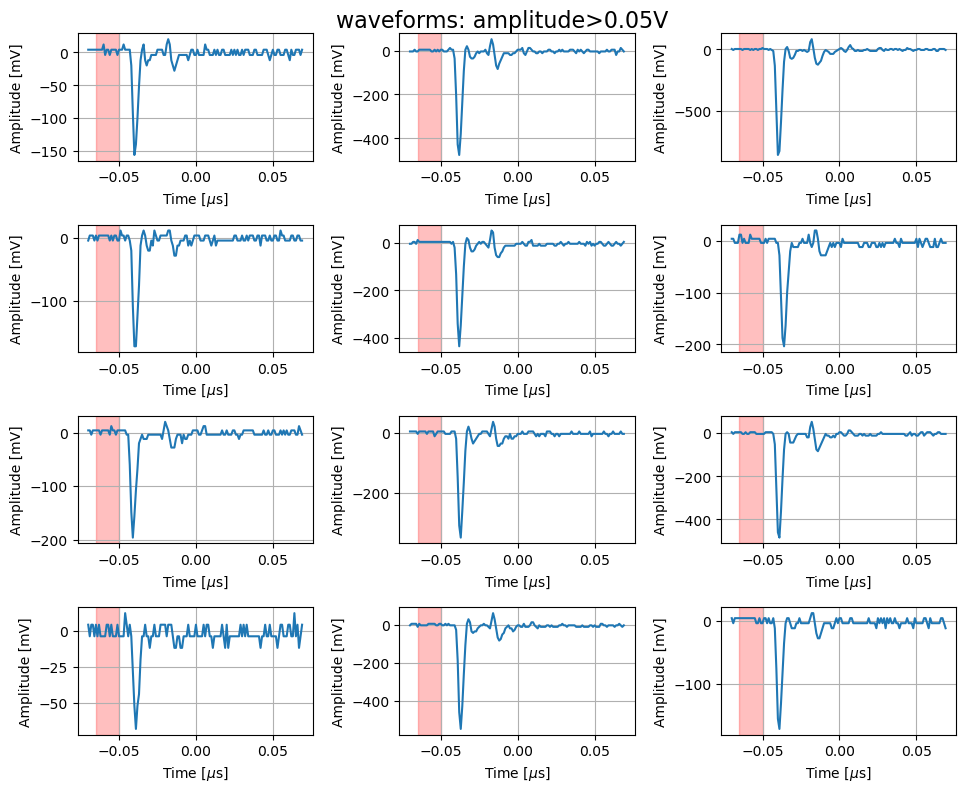

In [61]:
#%matplotlib widget
cut=0.05
i=0
j=0
plots_per_row=3
FRAMES=IND[AMP>cut]
FRAMES=FRAMES[:12]
fig, axs = plt.subplots(math.ceil(len(FRAMES)/plots_per_row), plots_per_row, figsize=(10, 8))
fig.tight_layout(pad=2.5)
fig.suptitle(f'waveforms: amplitude>{cut}V', size=16)
for frame in FRAMES:
    d = df.query(f'frame=={frame}')
    axs[i][j].plot(d.t1*1E6, d.a1*1000, label='CsI')
    axs[i][j].set_xlabel(r'Time [$\mu$s]')#, size=14)
    axs[i][j].set_ylabel('Amplitude [mV]')#, size=14)
    axs[i][j].axvspan(timerange[0]*1E6, timerange[1]*1E6, alpha=0.25, color='red')
    axs[i][j].grid()
    j+=1
    if j%plots_per_row==0:
        i+=1
        j=0
plt.show()


In [62]:
AMP = []
IND = []
for frame in df.frame.unique():
    d = df.query(f'frame=={frame}').query(f'{timerange[0]}<t1<{timerange[1]}')
    AMP+=[np.max(np.abs(d.a1))]
    IND+=[d.frame.unique()]
    
AMP = np.array(AMP)
IND = np.array(IND)



C:\Users\Belle2\AppData\Local\Temp\ipykernel_10904\1772672688.py:7: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


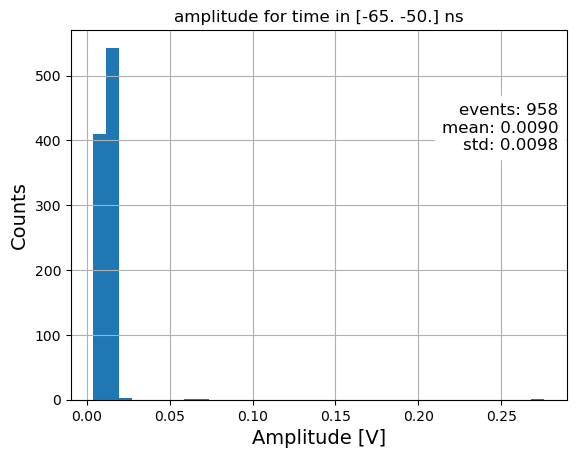

In [63]:
plt.hist(AMP, bins=35, label='CsI')

counts=len(AMP)
mean=np.mean(AMP)
std=np.std(AMP)

plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',
            xy=(0.98, 0.8), xycoords='axes fraction',
            ha='right', va='top', textcoords='offset points', backgroundcolor="w",
            fontsize=12)

#plt.yscale('log')
plt.xlabel('Amplitude [V]', size=14)
plt.ylabel('Counts', size=14)
#plt.legend()
plt.title(f'amplitude for time in {timerange*1E9} ns')
plt.grid()

plt.show()

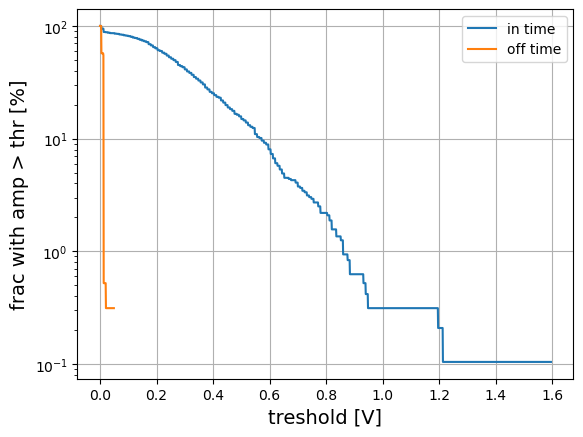

In [64]:
CUTS_OFF = np.arange(0, 0.05, 0.001)
COUNTS_OFF = []
for cut in CUTS_OFF:
    COUNTS_OFF+=[len(AMP[AMP>cut])]

plt.plot(CUTS_IN, np.array(COUNTS_IN)/COUNTS_IN[0]*100, label='in time')
plt.plot(CUTS_OFF, np.array(COUNTS_OFF)/COUNTS_IN[0]*100, label='off time')
plt.yscale('log')
plt.xlabel('treshold [V]', size=14)
plt.ylabel('frac with amp > thr [%]', size=14)
plt.legend()
plt.grid()

## PMT sopra

In [66]:
df = pd.read_csv('../data/20230413/PMMA_wtelescop_PMTsopra_200mV.txt', delimiter = " ", names=['frame', 't1', 'a1', 't2', 'a2', 't3', 'a3', 't4', 'a4'])#, 'time2', 'ampl2'])#, skiprows=150000 )

In [67]:
df

,frame,t1,a1,t2,a2,t3,a3,t4,a4
0,1.0,-7.000000e-08,0.004,-7.000000e-08,0.02,-7.000000e-08,0.01,NaN,NaN
1,1.0,-6.900000e-08,-0.004,-6.900000e-08,0.00,-6.900000e-08,0.01,NaN,NaN
2,1.0,-6.800000e-08,0.004,-6.800000e-08,0.02,-6.800000e-08,0.01,NaN,NaN
3,1.0,-6.700000e-08,-0.004,-6.700000e-08,0.00,-6.700000e-08,0.03,NaN,NaN
4,1.0,-6.600000e-08,0.004,-6.600000e-08,0.00,-6.600000e-08,0.01,NaN,NaN
...,...,...,...,...,...,...,...,...,...
104295,745.0,6.500000e-08,0.004,6.500000e-08,-0.02,6.500000e-08,-0.05,NaN,NaN
104296,745.0,6.600000e-08,0.004,6.600000e-08,-0.02,6.600000e-08,-0.03,NaN,NaN
104297,745.0,6.700000e-08,-0.004,6.700000e-08,-0.02,6.700000e-08,-0.03,NaN,NaN
104298,745.0,6.800000e-08,-0.012,6.800000e-08,-0.04,6.800000e-08,-0.03,NaN,NaN


Text(0, 0.5, 'Amplitude [mV]')

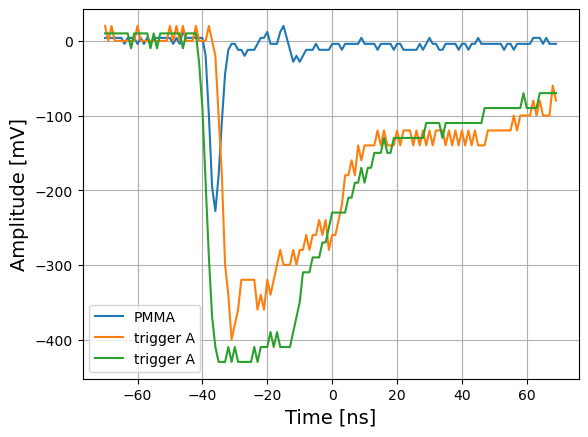

In [68]:
d=df.query('frame==16')
plt.plot(d.t1*1E9, d.a1*1000, label='PMMA')
plt.plot(d.t2*1E9, d.a2*1000, label='trigger A')
plt.plot(d.t3*1E9, d.a3*1000, label='trigger A')

#plt.plot(d.time2, d.ampl2)
plt.grid()
plt.legend()
plt.xlabel('Time [ns]', size=14)
plt.ylabel('Amplitude [mV]', size=14)
#plt.xlim(-1E2, 5E2)

Text(0, 0.5, 'Amplitude [mV]')

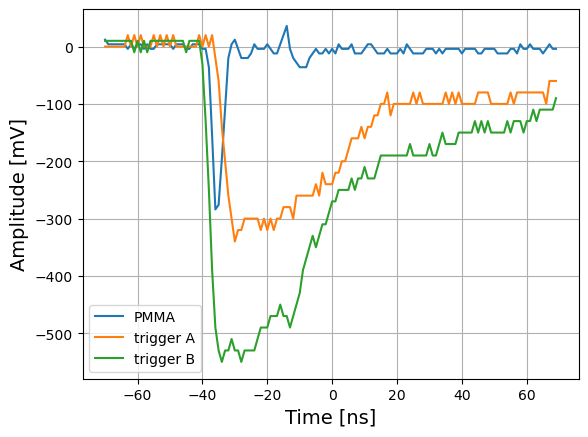

In [69]:
d=df.query('frame==65')
plt.plot(d.t1*1E9, d.a1*1000, label='PMMA')
plt.plot(d.t2*1E9, d.a2*1000, label='trigger A')
plt.plot(d.t3*1E9, d.a3*1000, label='trigger B')

#plt.plot(d.time2, d.ampl2)
plt.grid()
plt.legend()
plt.xlabel('Time [ns]', size=14)
plt.ylabel('Amplitude [mV]', size=14)
#plt.xlim(-1E2, 5E2)

(-50.0, -30.0)

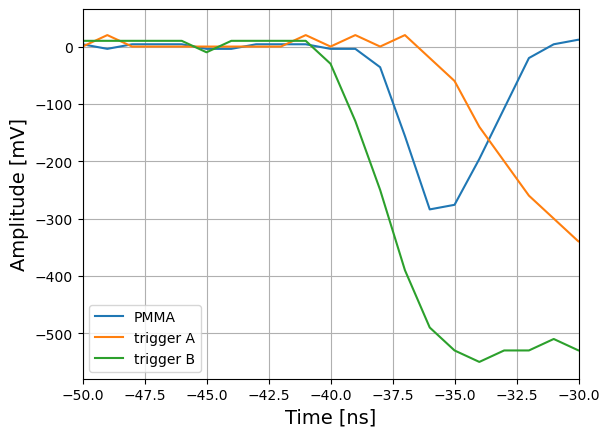

In [70]:
d=df.query('frame==65')
plt.plot(d.t1*1E9, d.a1*1000, label='PMMA')
plt.plot(d.t2*1E9, d.a2*1000, label='trigger A')
plt.plot(d.t3*1E9, d.a3*1000, label='trigger B')

#plt.plot(d.time2, d.ampl2)
plt.grid()
plt.legend()
plt.xlabel('Time [ns]', size=14)
plt.ylabel('Amplitude [mV]', size=14)
plt.xlim(-50, -30)

In [71]:
timerange = np.array([-45*1E-9, -30*1E-9])

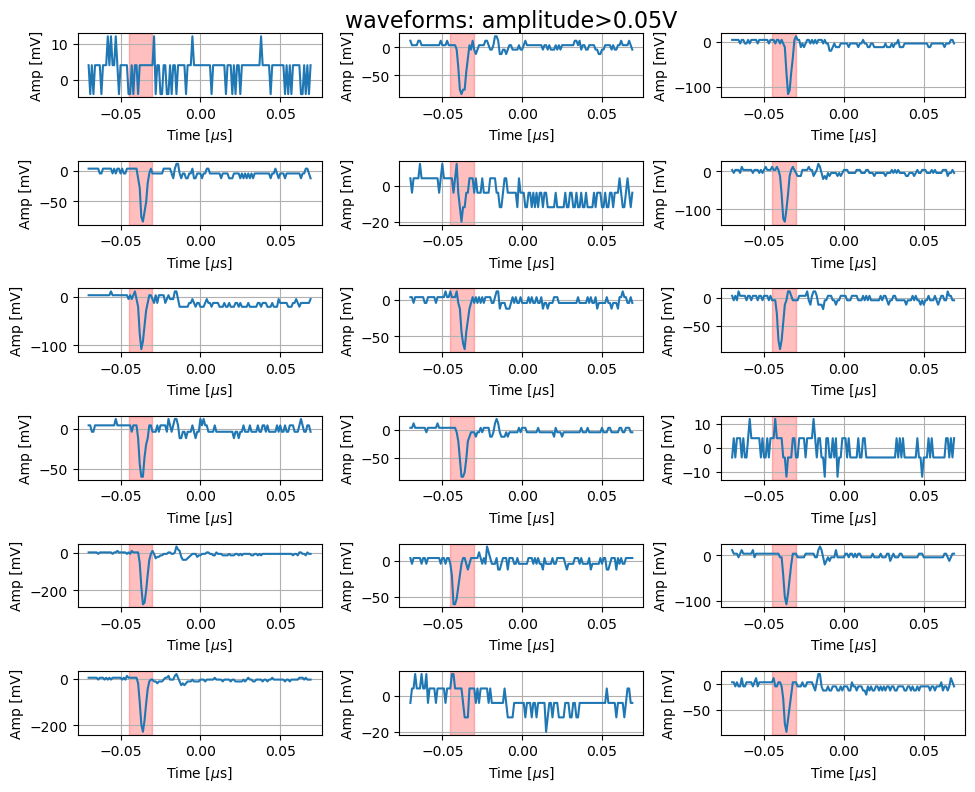

In [72]:
#%matplotlib widget
cut=0.05
i=0
j=0
plots_per_row=3
#FRAMES=IND[AMP>cut]
#FRAMES=FRAMES[:12]
FRAMES=np.arange(1, 19)
fig, axs = plt.subplots(math.ceil(len(FRAMES)/plots_per_row), plots_per_row, figsize=(10, 8))
fig.tight_layout(pad=2.5)
fig.suptitle(f'waveforms: amplitude>{cut}V', size=16)
for frame in FRAMES:
    d = df.query(f'frame=={frame}')
    axs[i][j].plot(d.t1*1E6, d.a1*1000, label='CsI')
    axs[i][j].set_xlabel(r'Time [$\mu$s]')#, size=14)
    axs[i][j].set_ylabel('Amp [mV]')#, size=14)
    axs[i][j].axvspan(timerange[0]*1E6, timerange[1]*1E6, alpha=0.25, color='red')
    axs[i][j].grid()
    j+=1
    if j%plots_per_row==0:
        i+=1
        j=0
plt.show()


In [73]:
AMP = []
IND = []
for frame in df.frame.unique():
    d = df.query(f'frame=={frame}').query(f'{timerange[0]}<t1<{timerange[1]}')
    AMP+=[np.max(np.abs(d.a1))]
    IND+=[d.frame.unique()]
    
AMP = np.array(AMP)
IND = np.array(IND)

C:\Users\Belle2\AppData\Local\Temp\ipykernel_10904\1389476667.py:5: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


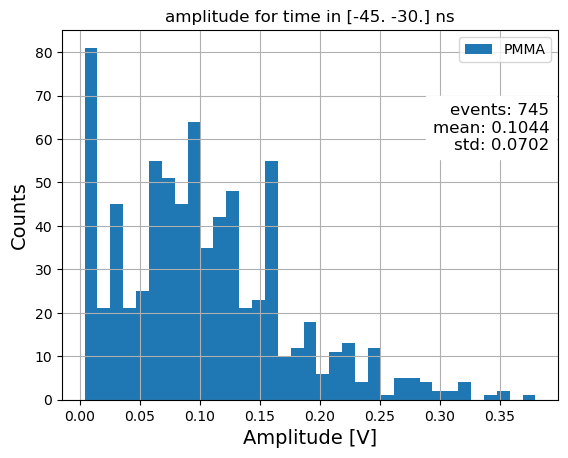

In [74]:
plt.hist(AMP, bins=35, label='PMMA')
counts=len(AMP)
mean=np.mean(AMP)
std=np.std(AMP)
plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',
            xy=(0.98, 0.8), xycoords='axes fraction',
            ha='right', va='top', textcoords='offset points', backgroundcolor="w",
            fontsize=12)
#plt.yscale('log')
plt.xlabel('Amplitude [V]', size=14)
plt.ylabel('Counts', size=14)
plt.legend()
plt.title(f'amplitude for time in {timerange*1E9} ns')
plt.grid()
plt.show()

C:\Users\Belle2\AppData\Local\Temp\ipykernel_10904\360249793.py:5: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',


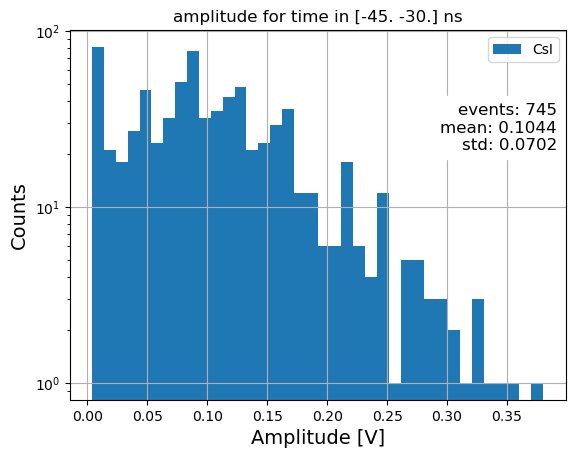

In [75]:
plt.hist(AMP, bins=38, label='CsI')
counts=len(AMP)
mean=np.mean(AMP)
std=np.std(AMP)
plt.annotate(f'events: {counts}\nmean: {mean:.4f}\nstd: {std:.4f}',
            xy=(0.98, 0.8), xycoords='axes fraction',
            ha='right', va='top', textcoords='offset points', backgroundcolor="w",
            fontsize=12)
#plt.yscale('log')
plt.xlabel('Amplitude [V]', size=14)
plt.ylabel('Counts', size=14)
plt.legend()
plt.title(f'amplitude for time in {timerange*1E9} ns')
plt.grid()
plt.yscale('log')
plt.show()

In [83]:
df = pd.read_csv('../data/20230413/PMMA_wtelescope_PMTsotto_200mV.txt', delimiter = " ", names=['frame', 't1', 'a1', 't2', 'a2', 't3', 'a3', 't4', 'a4'])#, 'time2', 'ampl2'])#, skiprows=150000 )

AMP = []
IND = []
for frame in df.frame.unique():
    d = df.query(f'frame=={frame}').query(f'{timerange[0]}<t1<{timerange[1]}')
    AMP+=[np.max(np.abs(d.a1))]
    IND+=[d.frame.unique()]
    
AMPsotto = np.array(AMP)
IND = np.array(IND)

df = pd.read_csv('../data/20230413/PMMA_wtelescop_PMTsopra_200mV.txt', delimiter = " ", names=['frame', 't1', 'a1', 't2', 'a2', 't3', 'a3', 't4', 'a4'])#, 'time2', 'ampl2'])#, skiprows=150000 )

AMP = []
IND = []
for frame in df.frame.unique():
    d = df.query(f'frame=={frame}').query(f'{timerange[0]}<t1<{timerange[1]}')
    AMP+=[np.max(np.abs(d.a1))]
    IND+=[d.frame.unique()]
    
AMPsopra = np.array(AMP)
IND = np.array(IND)

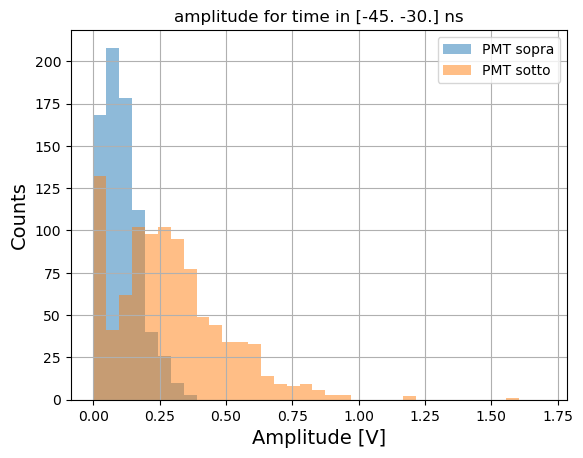

In [90]:
plt.hist(AMPsopra, bins=35, range=[0, 1.7], alpha = 0.5, label='PMT sopra')
plt.hist(AMPsotto, bins=35, range=[0, 1.7], alpha = 0.5, label='PMT sotto')
#plt.yscale('log')
plt.xlabel('Amplitude [V]', size=14)
plt.ylabel('Counts', size=14)
plt.legend()
plt.title(f'amplitude for time in {timerange*1E9} ns')
plt.grid()
#plt.yscale('log')
plt.show()

## PMT e sipm horizontal

In [4]:
df = pd.read_csv('../data/20230413/PMMA_wtelescope_PMT200mV_and_SiPM_horizontal.txt', delimiter = " ", names=['frame', 't1', 'a1', 't2', 'a2', 't3', 'a3', 't4', 'a4'])#, 'time2', 'ampl2'])#, skiprows=150000 )

In [5]:
df

,frame,t1,a1,t2,a2,t3,a3,t4,a4
0,1.0,-3.500000e-07,1.110223e-16,-3.500000e-07,0.00,-3.500000e-07,0.01,-3.500000e-07,0.0016
1,1.0,-3.490000e-07,-8.000000e-03,-3.490000e-07,0.00,-3.490000e-07,-0.01,-3.490000e-07,0.0008
2,1.0,-3.480000e-07,8.000000e-03,-3.480000e-07,0.00,-3.480000e-07,0.01,-3.480000e-07,0.0008
3,1.0,-3.470000e-07,-8.000000e-03,-3.470000e-07,0.00,-3.470000e-07,0.01,-3.470000e-07,0.0004
4,1.0,-3.460000e-07,1.110223e-16,-3.460000e-07,-0.02,-3.460000e-07,0.01,-3.460000e-07,0.0004
...,...,...,...,...,...,...,...,...,...
1283795,1834.0,3.450000e-07,1.110223e-16,3.450000e-07,-0.04,3.450000e-07,0.01,3.450000e-07,0.0008
1283796,1834.0,3.460000e-07,-8.000000e-03,3.460000e-07,-0.02,3.460000e-07,0.01,3.460000e-07,0.0000
1283797,1834.0,3.470000e-07,1.110223e-16,3.470000e-07,-0.04,3.470000e-07,-0.01,3.470000e-07,0.0004
1283798,1834.0,3.480000e-07,-8.000000e-03,3.480000e-07,-0.02,3.480000e-07,0.01,3.480000e-07,0.0004


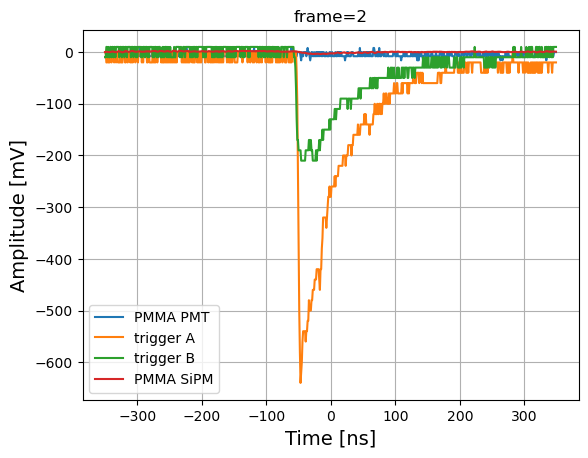

In [6]:
for f in [2]:
    d=df.query(f'frame=={f}')
    plt.plot(d.t1*1E9, d.a1*1000, label='PMMA PMT')
    plt.plot(d.t2*1E9, d.a2*1000, label='trigger A')
    plt.plot(d.t3*1E9, d.a3*1000, label='trigger B')
    plt.plot(d.t4*1E9, d.a4*1000, label='PMMA SiPM')

    #plt.plot(d.time2, d.ampl2)
    plt.grid()
    plt.legend()
    plt.xlabel('Time [ns]', size=14)
    plt.ylabel('Amplitude [mV]', size=14)
    plt.title(f'frame={f}')
    plt.show()

In [13]:
timerange = np.array([-100*1E-9, -0*1E-9])

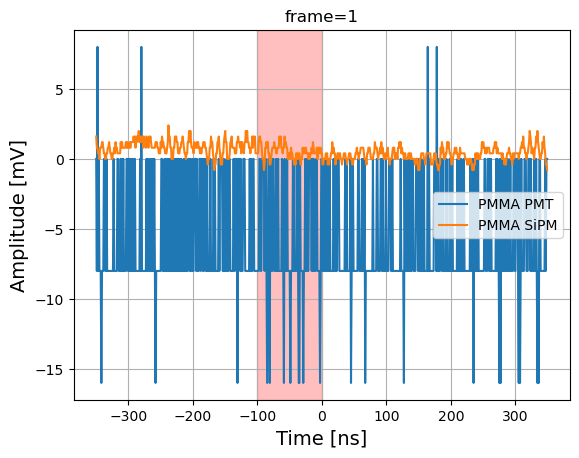

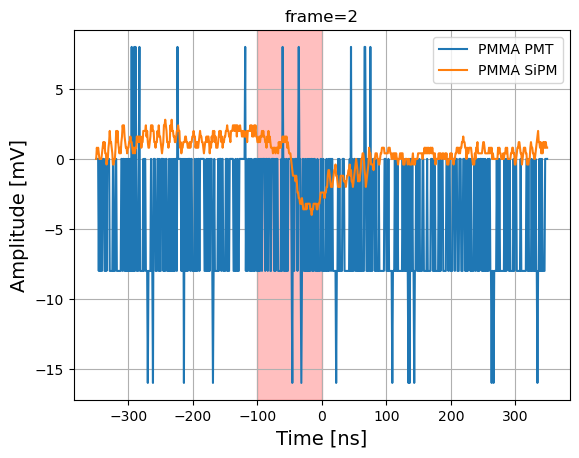

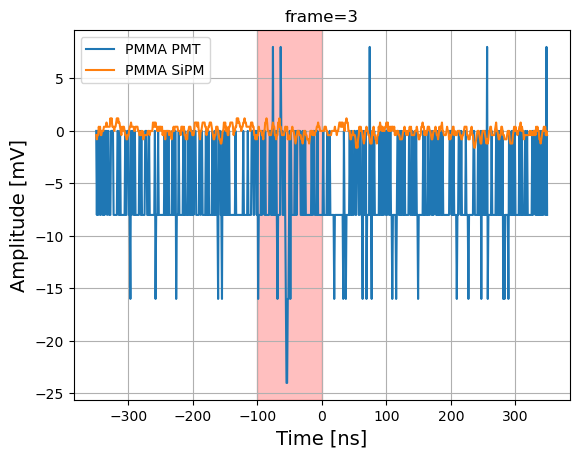

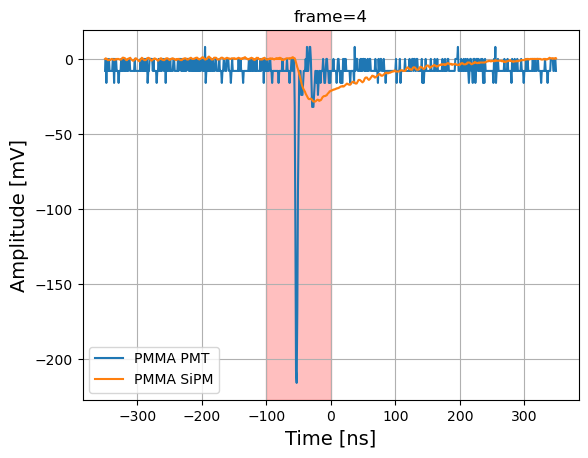

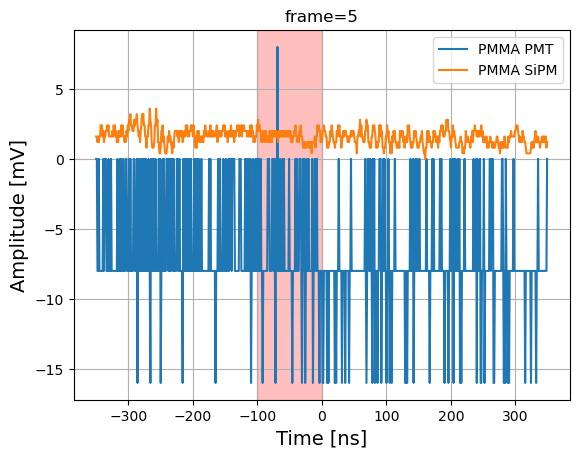

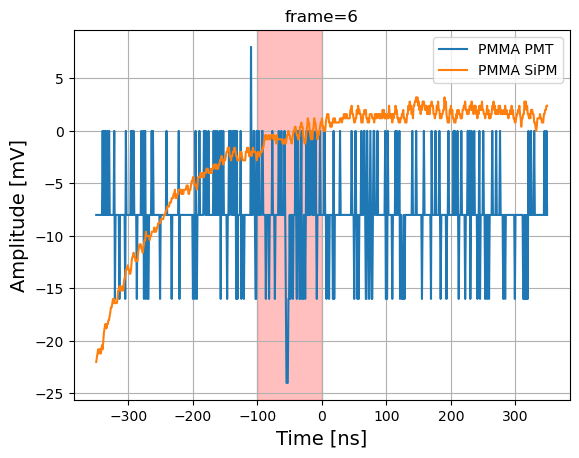

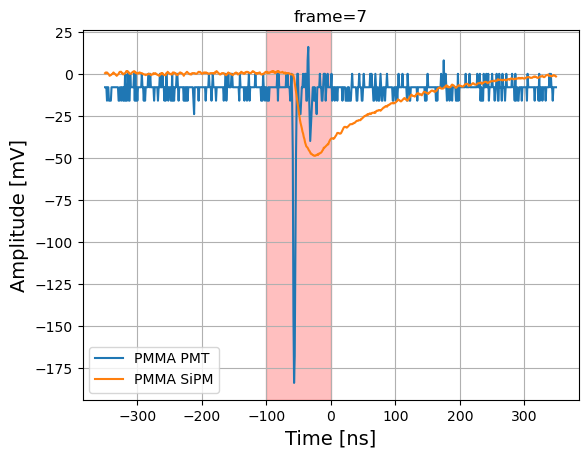

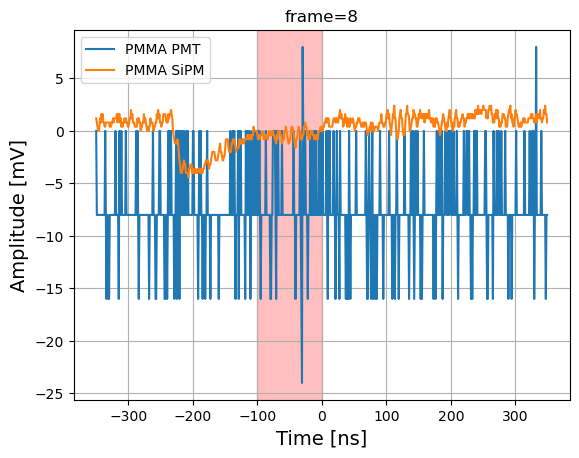

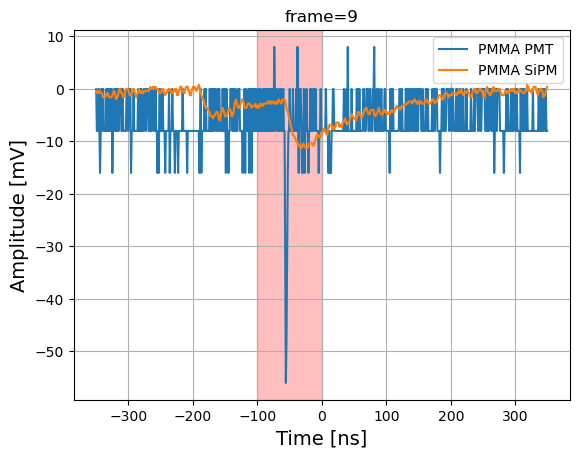

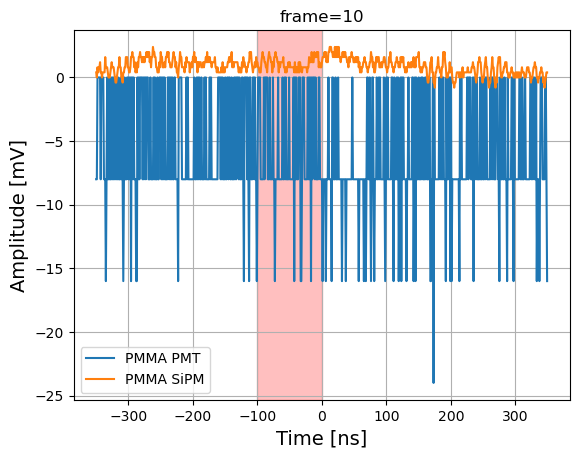

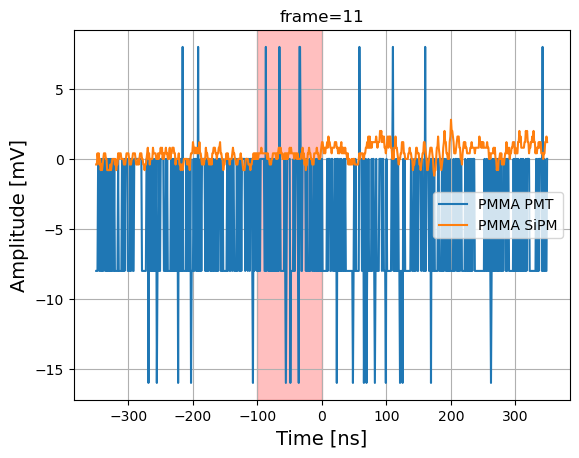

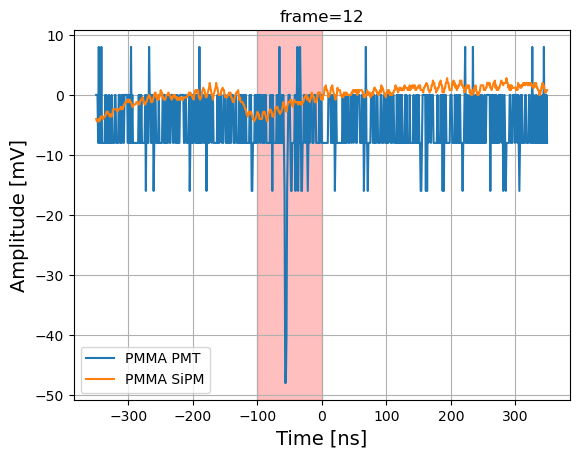

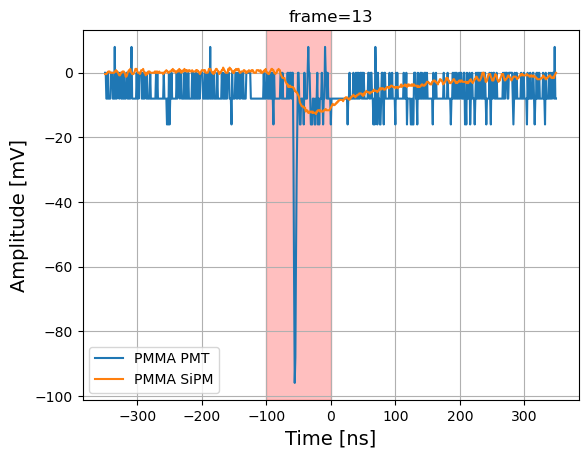

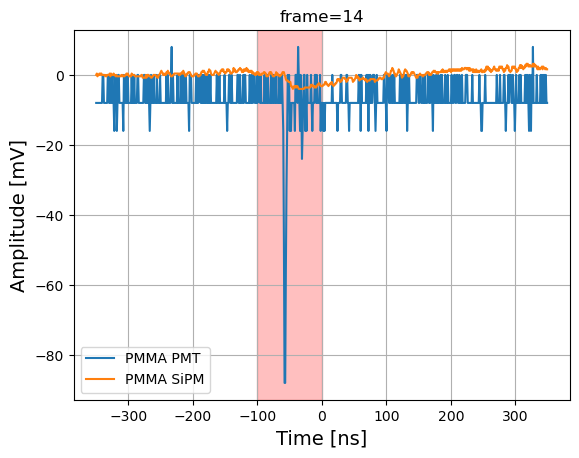

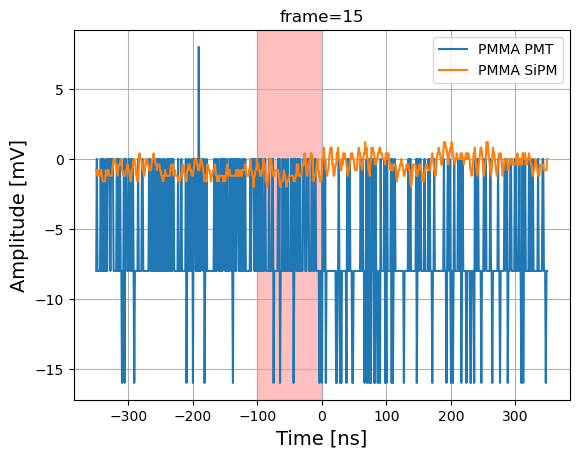

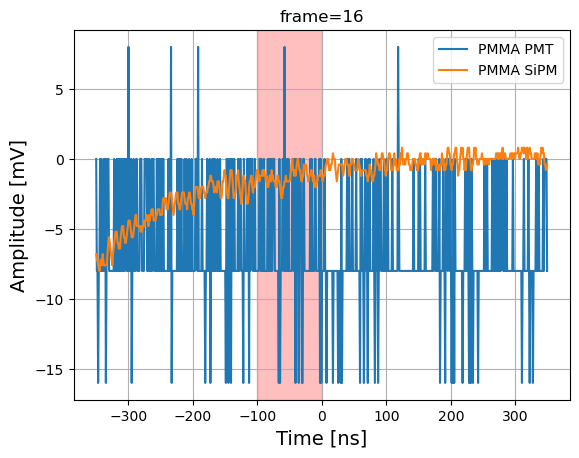

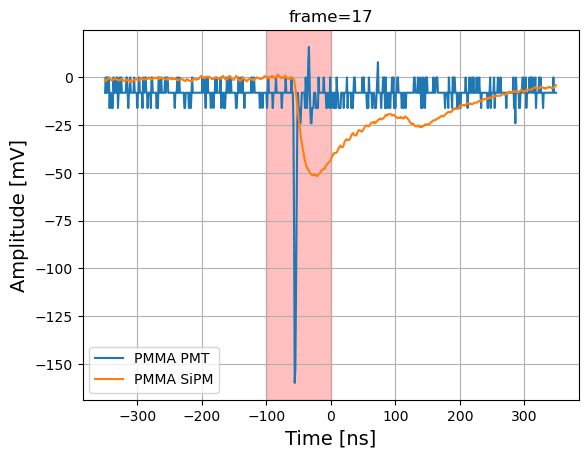

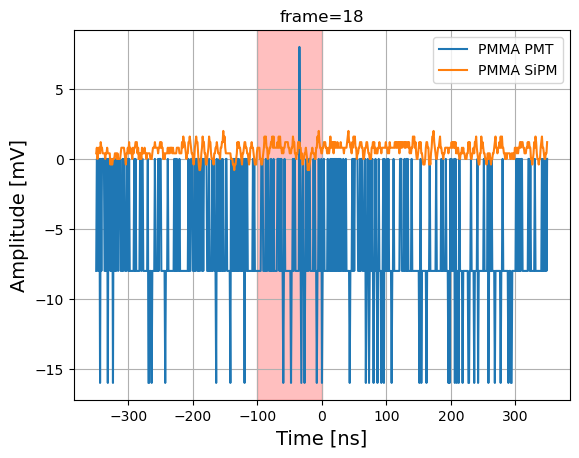

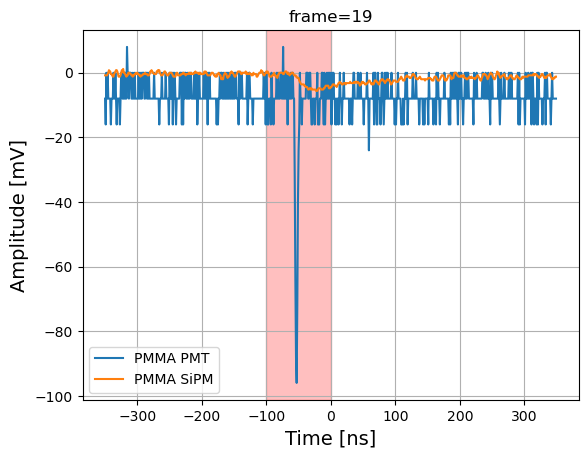

In [14]:
for f in range(1, 20):
    d=df.query(f'frame=={f}')
    plt.plot(d.t1*1E9, d.a1*1000, label='PMMA PMT')
    #plt.plot(d.t2*1E9, d.a2*1000, label='trigger A')
    #plt.plot(d.t3*1E9, d.a3*1000, label='trigger B')
    plt.plot(d.t4*1E9, d.a4*1000, label='PMMA SiPM')

    plt.axvspan(timerange[0]*1E9, timerange[1]*1E9, alpha=0.25, color='red')
    #plt.plot(d.time2, d.ampl2)
    plt.grid()
    plt.legend()
    plt.xlabel('Time [ns]', size=14)
    plt.ylabel('Amplitude [mV]', size=14)
    plt.title(f'frame={f}')
    plt.show()

In [15]:
AMP_PMT = []
AMP_SIPM = []
IND = []
for frame in df.frame.unique():
    d = df.query(f'frame=={frame}').query(f'{timerange[0]}<t1<{timerange[1]}')
    AMP_SIPM+=[np.max(np.abs(d.a4))]
    AMP_PMT+=[np.max(np.abs(d.a1))]
    IND+=[d.frame.unique()]
    
AMP_SIPM = np.array(AMP_SIPM)
AMP_PMT = np.array(AMP_PMT)
IND = np.array(IND)


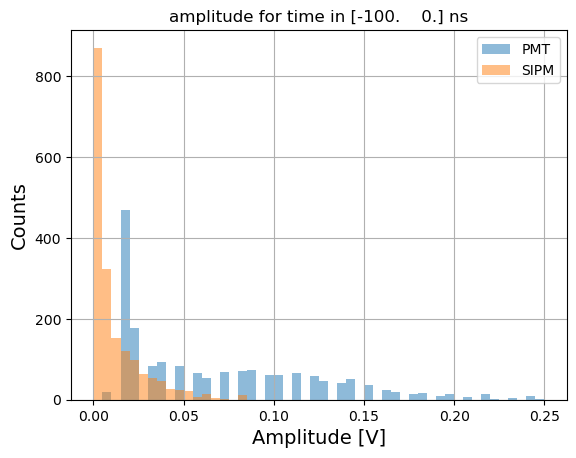

In [18]:
plt.hist(AMP_PMT, bins=50, range=[0, 0.25], alpha = 0.5, label='PMT')
plt.hist(AMP_SIPM, bins=50, range=[0, 0.25], alpha = 0.5, label='SIPM')
#plt.yscale('log')
plt.xlabel('Amplitude [V]', size=14)
plt.ylabel('Counts', size=14)
plt.legend()
plt.title(f'amplitude for time in {timerange*1E9} ns')
plt.grid()
#plt.yscale('log')
plt.show()

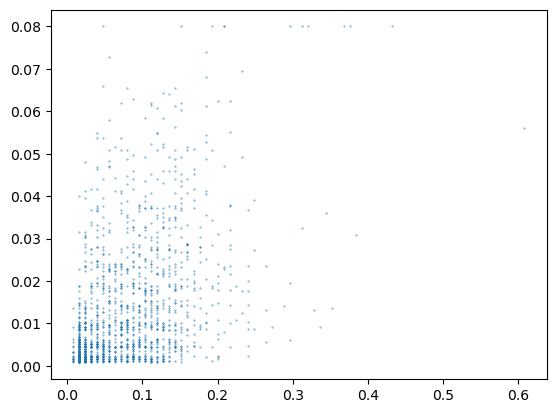

In [20]:
plt.scatter(AMP_PMT, AMP_SIPM, s=0.1)